In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
# Read in csv files
realtor = pd.read_csv("../data/realtor_housing_metrics_state.csv")

national_realtor = pd.read_csv("../data/realtor_housing_metrics_country.csv")

median_income = pd.read_csv("../data/median_income_by_state.csv")

national_median_income = pd.read_csv("../data/income_updated.csv", index_col = [0])

In [3]:
# Converting to datetime column & creating year column
realtor['month_date_yyyymm'] = pd.to_datetime(realtor['month_date_yyyymm'])

realtor['year'] = realtor['month_date_yyyymm'].dt.year

realtor['month'] = realtor['month_date_yyyymm'].dt.month_name()

national_realtor['month_date_yyyymm'] = pd.to_datetime(national_realtor['month_date_yyyymm'])

national_realtor['year'] = national_realtor['month_date_yyyymm'].dt.year

national_realtor['month'] = national_realtor['month_date_yyyymm'].dt.month_name()

In [4]:
# Creating df for housing by state & housing for the whole country
state_housing_df = realtor.merge(median_income)

national_housing_df = national_realtor.merge(national_median_income)

state_housing_df.to_csv("../data/state_housing.csv", index = False)
national_housing_df.to_csv("../data/national_housing.csv", index = False)

national_housing_df = pd.read_csv('../data/national_housing.csv')

# Create affordability index line graph at national level

In [48]:
national_housing_df['month_date_yyyymm'] = pd.to_datetime(national_housing_df['month_date_yyyymm'])

In [7]:
# Take median income and divide by median listing price
national_housing_df['affordability_index'] = national_housing_df['median_income'] / national_housing_df['median_listing_price']

<Axes: xlabel='month_date_yyyymm', ylabel='affordability_index'>

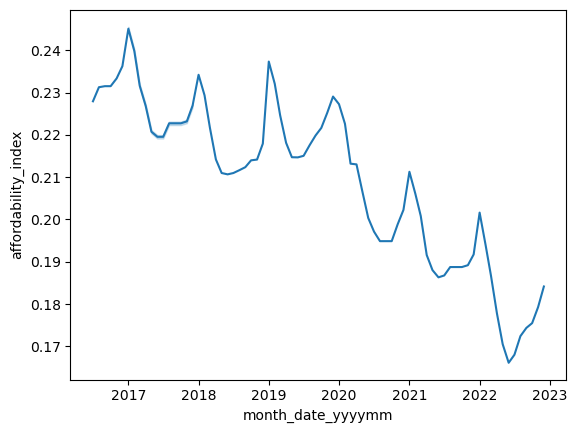

In [9]:
sns.lineplot(national_housing_df, x = 'month_date_yyyymm', y = 'affordability_index')

Text(0.5, 1.0, 'Income to Home Price Ratio Over Time')

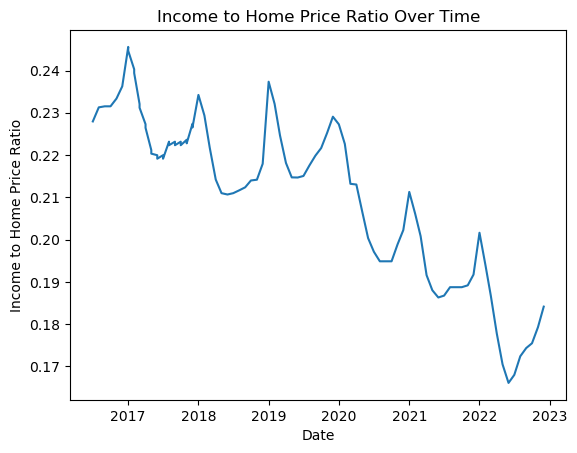

In [17]:
# Create line graph for national affordability index over several years
fig, ax = plt.subplots()
ax.plot(national_housing_df['month_date_yyyymm'], national_housing_df['affordability_index'])

# Set the title and axes
ax.set_xlabel('Date')
ax.set_ylabel('Income to Home Price Ratio')
ax.set_title('Income to Home Price Ratio Over Time')

(0.0, 0.35)

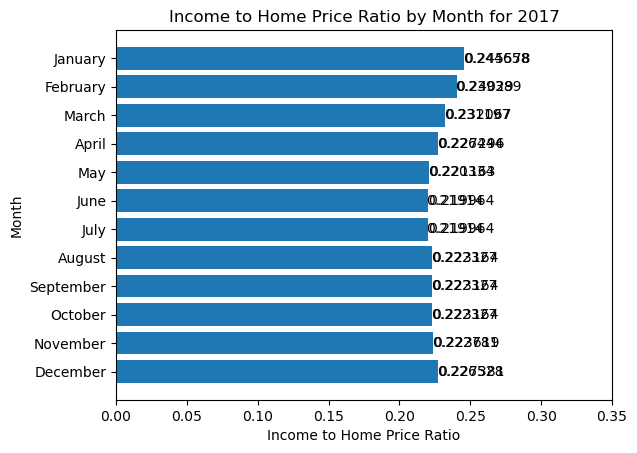

In [53]:
# Select the year
year = 2017

# Create dataframe filtered for selected year
filtered_df = national_housing_df.query(f'year == {year}')

# Define x and y
x = filtered_df['affordability_index']
y = filtered_df['month']

# Create horizontal bar chart for national affordability index by month
fig, ax = plt.subplots()
bars = ax.barh(y, x)

# Set the title and axes
ax.set_xlabel('Income to Home Price Ratio')
ax.set_ylabel('Month')
ax.set_title(f'Income to Home Price Ratio by Month for {year}')

ax.bar_label(bars)
ax.set_xlim(0,0.35)



In [55]:
national_housing_df.query("year == 2017")

,month_date_yyyymm,country,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,pending_ratio,quality_flag,year,month,median_income,affordability_index
60,2017-12-01,United States,269900.0,1127799.0,78.0,288036.0,36624.0,223704.0,286839.0,133.0,1917.0,473364.0,1411585.0,0.2543,0.0,2017,December,61140,0.226528
61,2017-12-01,United States,269900.0,1127799.0,78.0,288036.0,36624.0,223704.0,286839.0,133.0,1917.0,473364.0,1411585.0,0.2543,0.0,2017,December,61370,0.227381
62,2017-11-01,United States,274440.0,1228077.0,71.0,384190.0,40318.0,328048.0,323930.0,133.0,1940.0,473291.0,1548786.0,0.2638,0.0,2017,November,61140,0.222781
63,2017-11-01,United States,274440.0,1228077.0,71.0,384190.0,40318.0,328048.0,323930.0,133.0,1940.0,473291.0,1548786.0,0.2638,0.0,2017,November,61370,0.223619
64,2017-10-01,United States,275000.0,1287322.0,68.0,428150.0,44488.0,380448.0,351795.0,134.0,1951.0,474057.0,1637374.0,0.2733,0.0,2017,October,61140,0.222327
65,2017-10-01,United States,275000.0,1287322.0,68.0,428150.0,44488.0,380448.0,351795.0,134.0,1951.0,474057.0,1637374.0,0.2733,0.0,2017,October,61370,0.223164
66,2017-09-01,United States,275000.0,1308607.0,64.0,439196.0,43576.0,386660.0,369422.0,133.0,1960.0,472472.0,1672573.0,0.2823,0.0,2017,September,61140,0.222327
67,2017-09-01,United States,275000.0,1308607.0,64.0,439196.0,43576.0,386660.0,369422.0,133.0,1960.0,472472.0,1672573.0,0.2823,0.0,2017,September,61370,0.223164
68,2017-08-01,United States,275000.0,1325358.0,61.0,500082.0,49266.0,420538.0,391872.0,133.0,1967.0,471512.0,1710377.0,0.2957,0.0,2017,August,61140,0.222327
69,2017-08-01,United States,275000.0,1325358.0,61.0,500082.0,49266.0,420538.0,391872.0,133.0,1967.0,471512.0,1710377.0,0.2957,0.0,2017,August,61370,0.223164


# Create affordability index line graph by state

In [90]:
# Take median income and divide by median listing price
housing_df['affordability_index'] = housing_df['Households'] / housing_df['median_listing_price']

In [38]:
housing_df.query("state == 'Hawaii'")

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,total_listing_count,pending_ratio,quality_flag,year,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over,affordability_index
456,2022-12-01,Hawaii,HI,845000.0,3508.0,68.0,1116.0,28.0,684.0,1461.0,...,4997.0,0.4165,0.0,2022,94814,55565,96571,110596,81656,0.112206
457,2022-11-01,Hawaii,HI,847000.0,3472.0,61.0,1346.0,28.0,858.0,1587.0,...,5059.0,0.4571,0.0,2022,94814,55565,96571,110596,81656,0.111941
458,2022-10-01,Hawaii,HI,850000.0,3297.0,60.0,1344.0,32.0,892.0,1785.0,...,5054.0,0.5414,0.0,2022,94814,55565,96571,110596,81656,0.111546
459,2022-09-01,Hawaii,HI,870000.0,3108.0,59.0,1458.0,42.0,910.0,2011.0,...,5091.0,0.6470,0.0,2022,94814,55565,96571,110596,81656,0.108982
460,2022-08-01,Hawaii,HI,886500.0,3142.0,53.0,1436.0,30.0,902.0,2053.0,...,5198.0,0.6534,0.0,2022,94814,55565,96571,110596,81656,0.106953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775,2016-11-01,Hawaii,HI,652500.0,5882.0,89.0,1704.0,64.0,744.0,1699.0,...,7583.0,0.2888,NaN,2016,71977,39474,72915,82810,61116,0.110310
3776,2016-10-01,Hawaii,HI,649900.0,5904.0,89.0,1788.0,68.0,872.0,1681.0,...,7602.0,0.2847,NaN,2016,71977,39474,72915,82810,61116,0.110751
3777,2016-09-01,Hawaii,HI,649975.0,6024.0,88.0,1558.0,50.0,936.0,1729.0,...,7766.0,0.2870,NaN,2016,71977,39474,72915,82810,61116,0.110738
3778,2016-08-01,Hawaii,HI,650000.0,6257.0,87.0,1734.0,70.0,978.0,1735.0,...,8006.0,0.2772,NaN,2016,71977,39474,72915,82810,61116,0.110734


In [46]:
national_housing_df['affordability_index'] = national_housing_df['median_income'] / national_housing_df['median_listing_price']

In [11]:
state_housing_df['affordability_index'] = state_housing_df['Households'] / state_housing_df['median_listing_price']

In [65]:
(housing_for_state.columns).to_list()

['month_date_yyyymm',
 'state',
 'state_id',
 'median_listing_price',
 'active_listing_count',
 'median_days_on_market',
 'new_listing_count',
 'price_increased_count',
 'price_reduced_count',
 'pending_listing_count',
 'median_listing_price_per_square_foot',
 'median_square_feet',
 'average_listing_price',
 'total_listing_count',
 'pending_ratio',
 'quality_flag',
 'year',
 'month',
 'Households',
 '15 to 24 years',
 '25 to 44 years',
 '45 to 64 years',
 '65 years and over',
 'affordability_index']

In [35]:
states = ['Florida','Michigan','Tennessee']

state_housing_df[state_housing_df['state'].isin(states)]

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,pending_ratio,quality_flag,year,month,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over,affordability_index
228,2022-12-01,Florida,FL,450000.0,89502.0,64.0,29752.0,1980.0,28328.0,42232.0,...,0.4719,0.0,2022,December,67917,41020,73861,80393,53384,0.150927
229,2022-11-01,Florida,FL,455000.0,89632.0,61.0,33738.0,1722.0,35910.0,44788.0,...,0.4997,0.0,2022,November,67917,41020,73861,80393,53384,0.149268
230,2022-10-01,Florida,FL,459900.0,84323.0,58.0,35456.0,1800.0,34164.0,48108.0,...,0.5705,0.0,2022,October,67917,41020,73861,80393,53384,0.147678
231,2022-09-01,Florida,FL,465000.0,81828.0,51.0,41008.0,2056.0,37556.0,53555.0,...,0.6545,0.0,2022,September,67917,41020,73861,80393,53384,0.146058
232,2022-08-01,Florida,FL,474500.0,80071.0,44.0,41680.0,2220.0,36210.0,54957.0,...,0.6864,0.0,2022,August,67917,41020,73861,80393,53384,0.143134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3961,2016-11-01,Florida,FL,300000.0,139417.0,76.0,41930.0,4950.0,41056.0,48970.0,...,0.3512,NaN,2016,November,48900,26344,51901,57398,39404,0.163000
3962,2016-10-01,Florida,FL,300000.0,136158.0,78.0,40220.0,4060.0,37900.0,50742.0,...,0.3727,NaN,2016,October,48900,26344,51901,57398,39404,0.163000
3963,2016-09-01,Florida,FL,299950.0,133846.0,76.0,40684.0,4314.0,39836.0,53107.0,...,0.3968,NaN,2016,September,48900,26344,51901,57398,39404,0.163027
3964,2016-08-01,Florida,FL,299900.0,134952.0,75.0,41430.0,4448.0,37378.0,55141.0,...,0.4086,NaN,2016,August,48900,26344,51901,57398,39404,0.163054


(0.0, 510354.2)

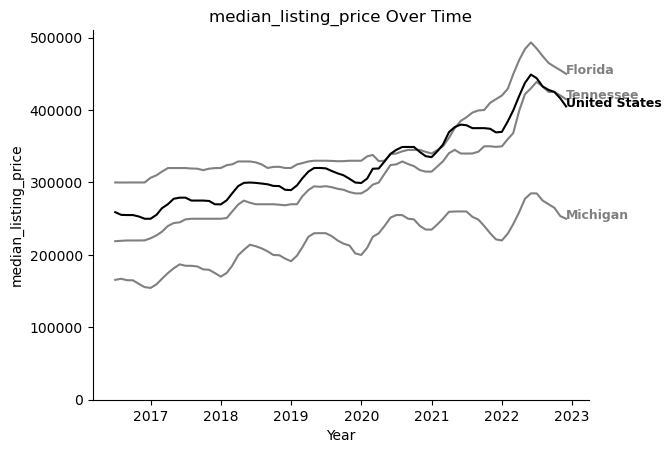

In [49]:
show_national = True

# Shows the affordability index over the years for the selected state
metric = 'median_listing_price'
states = ['Florida','Michigan','Tennessee']

# Subsetting dataframe for selected states
housing_for_state = state_housing_df[state_housing_df['state'].isin(states)]

# Create line graph for national affordability index over several years
fig, ax1 = plt.subplots()

for state in states:
    # Subset dataset for that state
    state_data = housing_for_state.query(f"state == '{state}'")

    # Plot line graph 
    ax1.plot(state_data['month_date_yyyymm'], state_data[f'{metric}'], color = 'grey')

    # Label the end of each line
    ax1.text(state_data['month_date_yyyymm'].iloc[0],
         state_data[f'{metric}'].iloc[0],
         state,
         fontsize = 9,
         ha = 'left',
         color = 'grey',
         fontweight = 'bold')

# Add a line for the entire united states
if show_national == True:
    ax1.plot(national_housing_df['month_date_yyyymm'], national_housing_df[f'{metric}'], color = 'black')
    
    ax1.text(national_housing_df['month_date_yyyymm'].iloc[0],
            national_housing_df[f'{metric}'].iloc[0],
            'United States',
            fontsize = 9,
            ha = 'left',
            color = 'black',
            fontweight = 'bold')

# Set the title and axes
ax1.set_xlabel('Year')
ax1.set_ylabel(f'{metric}')
ax1.set_title(f'{metric} Over Time')

# Remove the spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Define y range
ax1.set_ylim(bottom = 0)

# Create top/bottom 5 states by affordability index bar chart

In [50]:
state_housing_df

,month_date_yyyymm,state,state_id,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,...,pending_ratio,quality_flag,year,month,Households,15 to 24 years,25 to 44 years,45 to 64 years,65 years and over,affordability_index
0,2022-12-01,Rhode Island,RI,475000.0,1182.0,45.0,544.0,12.0,228.0,1268.0,...,1.0728,0.0,2022,December,81370,43688,86770,100530,56242,0.171305
1,2022-11-01,Rhode Island,RI,475000.0,1384.0,38.0,856.0,12.0,458.0,1462.0,...,1.0564,0.0,2022,November,81370,43688,86770,100530,56242,0.171305
2,2022-10-01,Rhode Island,RI,475000.0,1376.0,37.0,944.0,8.0,460.0,1620.0,...,1.1773,0.0,2022,October,81370,43688,86770,100530,56242,0.171305
3,2022-09-01,Rhode Island,RI,484475.0,1353.0,40.0,1006.0,4.0,414.0,1826.0,...,1.3496,0.0,2022,September,81370,43688,86770,100530,56242,0.167955
4,2022-08-01,Rhode Island,RI,482675.0,1460.0,34.0,1084.0,14.0,444.0,1932.0,...,1.3233,0.0,2022,August,81370,43688,86770,100530,56242,0.168581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3973,2016-11-01,Iowa,IA,164900.0,13242.0,73.0,3344.0,308.0,3052.0,3033.0,...,0.2290,NaN,2016,November,54570,27458,62191,67143,38140,0.330928
3974,2016-10-01,Iowa,IA,163950.0,13746.0,68.0,3896.0,320.0,3620.0,3327.0,...,0.2420,NaN,2016,October,54570,27458,62191,67143,38140,0.332845
3975,2016-09-01,Iowa,IA,162950.0,13855.0,67.0,4138.0,286.0,3712.0,3642.0,...,0.2629,NaN,2016,September,54570,27458,62191,67143,38140,0.334888
3976,2016-08-01,Iowa,IA,162950.0,13895.0,65.0,4458.0,338.0,3732.0,3866.0,...,0.2782,NaN,2016,August,54570,27458,62191,67143,38140,0.334888


[Text(0, 0, '539000'),
 Text(0, 0, '568730'),
 Text(0, 0, '575000'),
 Text(0, 0, '595000'),
 Text(0, 0, '599900'),
 Text(0, 0, '599900'),
 Text(0, 0, '649000'),
 Text(0, 0, '675000'),
 Text(0, 0, '695000'),
 Text(0, 0, '845000')]

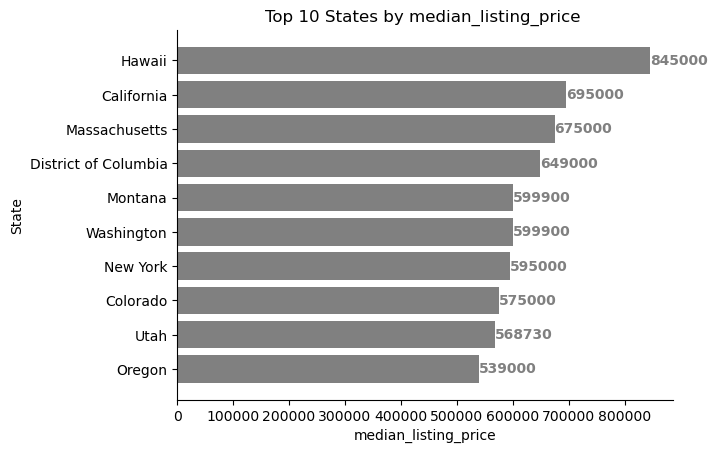

In [66]:
metric = 'median_listing_price'
month = 'December'
year = 2022

filtered_df = state_housing_df.query(f"year == {year} and month == '{month}'")\
.sort_values(f"{metric}", ascending = False).reset_index()

filtered_df = filtered_df[['month_date_yyyymm','state',f'{metric}']]
, ascending = False
top_10_states = filtered_df.head(10)
top_10_states = top_10_states.sort_values(by = f"{metric}", ascending = True)

bottom_10_states = filtered_df.tail(10)

# Define x and y
x = top_10_states[f'{metric}']
y = top_10_states['state']

# Create horizontal bar chart for national affordability index by month
fig, ax = plt.subplots()
bars = ax.barh(y, x, color = 'grey')

# Set the title and axes
ax.set_xlabel(f'{metric}')
ax.set_ylabel('State')
ax.set_title(f'Top 10 States by {metric} ')

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.bar_label(bars, color = 'grey', fontweight = 'bold')

In [93]:
housing_df.columns

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'active_listing_count', 'median_days_on_market', 'new_listing_count',
       'price_increased_count', 'price_reduced_count', 'pending_listing_count',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count', 'pending_ratio',
       'quality_flag', 'year', 'month', 'Households', '15 to 24 years',
       '25 to 44 years', '45 to 64 years', '65 years and over',
       'affordability_index'],
      dtype='object')